<a href="https://colab.research.google.com/github/MPGarg/Assignment-9/blob/main/EVA8_Assigment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
from __future__ import print_function
import torch.optim as optim
from torchvision import datasets, transforms
import torch
import torch.nn.functional as F
import torchvision
from torchsummary import summary
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
#!pip install -U albumentations
!pip install torch_lr_finder
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch_lr_finder import LRFinder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import files from GIT Hub

In [3]:
!git clone https://github.com/MPGarg/main_repo.git

Cloning into 'main_repo'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 105 (delta 23), reused 47 (delta 21), pack-reused 52
Receiving objects: 100% (105/105), 38.05 KiB | 19.03 MiB/s, done.
Resolving deltas: 100% (43/43), done.


# Custom Net class is imported

In [4]:
from main_repo.models import model9
from main_repo.models.model9 import Net

# Import Other fuctions

In [5]:
from main_repo import main, utils
from main_repo.utils import *    
from main_repo.main import train, test, fit_model

# Assign device

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [7]:
view_model = Net().to(device)
summary(view_model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
         Dropout2d-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
         Dropout2d-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 48, 32, 32]          13,824
      BatchNorm2d-10           [-1, 48, 32, 32]              96
             ReLU-11           [-1, 48, 32, 32]               0
        Dropout2d-12           [-1, 48, 32, 32]               0
        AvgPool2d-13             [-1, 48, 1, 1]               0
           Linear-14                   

# Show sample images and Load dataset

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


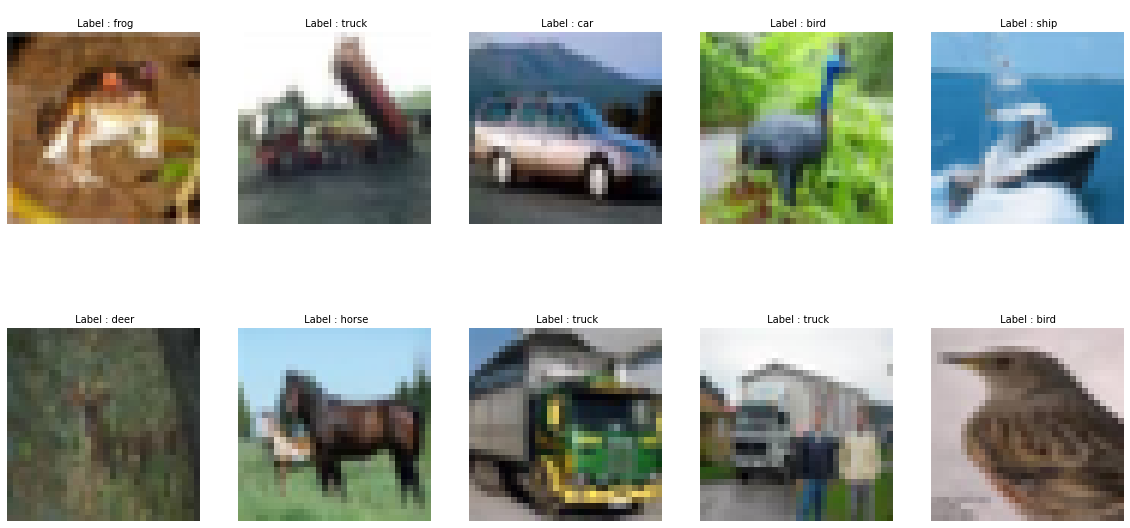

In [8]:
trainset_mod, trainloader_mod, testset_mod, testloader_mod,mean, std,trainset_lr,trainloader_lr = process_dataset(visualize = 'X')     

# Find Learning Rate

  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 9.12E-03


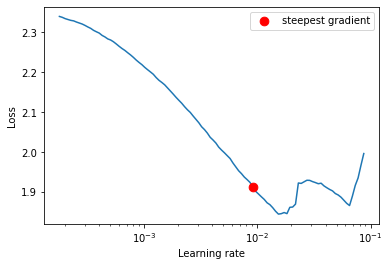

(<AxesSubplot:xlabel='Learning rate', ylabel='Loss'>, 0.00911588829975082)

In [9]:
import copy
model = Net().to(device)
model_exp = copy.deepcopy(model)
optimizer = torch.optim.Adam(model_exp.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(model_exp, optimizer, criterion, device=device)
lr_finder.range_test(trainloader_lr, end_lr=10, num_iter=200)
lr_finder.plot() 

In [10]:
min_loss = min(lr_finder.history['loss'])
ler_rate = lr_finder.history['lr'][np.argmin(lr_finder.history['loss'], axis=0)]
print("Max LR is {}".format(ler_rate))

Max LR is 0.015343684089300124


# Train & Test Model

In [11]:
optimizer = torch.optim.Adam(model.parameters(), lr=ler_rate/10) 

scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, 
                                                max_lr=ler_rate,
                                                steps_per_epoch=len(trainloader_mod), 
                                                epochs=24,
                                                pct_start=0.15,
                                                div_factor=10,
                                                three_phase=False, 
                                                #final_div_factor=1000,
                                                anneal_strategy='linear'
                                                ) 

model_tr, wrong_prediction_list, right_prediction_list, train_losses, train_acc, test_losses, test_acc = fit_model(
                                                    model=model, 
                                                    device=device,
                                                    trainloader=trainloader_mod, 
                                                    testloader=testloader_mod,
                                                    criterion = nn.CrossEntropyLoss(),
                                                    EPOCHS=24,
                                                    optimizer=optimizer,
                                                    scheduler=scheduler
                                                    
                                                )

EPOCH: 1 (LR: 0.0015343684089300124)


100%|██████████| 98/98 [00:09<00:00, 10.44it/s]


Average Training Loss=0.0036169435334205626, Accuracy=32.27


Test set: Average loss: 0.0033, Accuracy: 3721/10000 (37.21%)

EPOCH: 2 (LR: 0.005381193129442437)


100%|██████████| 98/98 [00:09<00:00, 10.45it/s]


Average Training Loss=0.003046590232849121, Accuracy=42.712


Test set: Average loss: 0.0029, Accuracy: 4451/10000 (44.51%)

EPOCH: 3 (LR: 0.009228017849954862)


100%|██████████| 98/98 [00:08<00:00, 11.58it/s]


Average Training Loss=0.012262866339683532, Accuracy=19.958


Test set: Average loss: 0.0041, Accuracy: 2280/10000 (22.80%)

EPOCH: 4 (LR: 0.013074842570467286)


100%|██████████| 98/98 [00:09<00:00, 10.84it/s]


Average Training Loss=0.00385100900888443, Accuracy=25.758


Test set: Average loss: 0.0038, Accuracy: 2914/10000 (29.14%)

EPOCH: 5 (LR: 0.015035155711834707)


100%|██████████| 98/98 [00:09<00:00, 10.48it/s]


Average Training Loss=0.003671176691055298, Accuracy=29.068


Test set: Average loss: 0.0037, Accuracy: 3135/10000 (31.35%)

EPOCH: 6 (LR: 0.014283021856322)


100%|██████████| 98/98 [00:09<00:00, 10.60it/s]


Average Training Loss=0.003563849649429321, Accuracy=31.556


Test set: Average loss: 0.0036, Accuracy: 3237/10000 (32.37%)

EPOCH: 7 (LR: 0.013530888000809293)


100%|██████████| 98/98 [00:08<00:00, 11.22it/s]


Average Training Loss=0.0034646080684661864, Accuracy=33.156


Test set: Average loss: 0.0034, Accuracy: 3583/10000 (35.83%)

EPOCH: 8 (LR: 0.012778754145296585)


100%|██████████| 98/98 [00:08<00:00, 11.81it/s]


Average Training Loss=0.003368065869808197, Accuracy=35.674


Test set: Average loss: 0.0033, Accuracy: 3788/10000 (37.88%)

EPOCH: 9 (LR: 0.012026620289783877)


100%|██████████| 98/98 [00:09<00:00, 10.59it/s]


Average Training Loss=0.003293227958679199, Accuracy=37.18


Test set: Average loss: 0.0034, Accuracy: 3710/10000 (37.10%)

EPOCH: 10 (LR: 0.01127448643427117)


100%|██████████| 98/98 [00:09<00:00, 10.50it/s]


Average Training Loss=0.003244021706581116, Accuracy=38.346


Test set: Average loss: 0.0032, Accuracy: 3996/10000 (39.96%)

EPOCH: 11 (LR: 0.010522352578758463)


100%|██████████| 98/98 [00:09<00:00, 10.49it/s]


Average Training Loss=0.003192476279735565, Accuracy=39.496


Test set: Average loss: 0.0032, Accuracy: 4056/10000 (40.56%)

EPOCH: 12 (LR: 0.009770218723245756)


100%|██████████| 98/98 [00:08<00:00, 11.74it/s]


Average Training Loss=0.003145362238883972, Accuracy=40.56


Test set: Average loss: 0.0032, Accuracy: 4088/10000 (40.88%)

EPOCH: 13 (LR: 0.009018084867733048)


100%|██████████| 98/98 [00:09<00:00, 10.34it/s]


Average Training Loss=0.0031144383716583254, Accuracy=41.212


Test set: Average loss: 0.0031, Accuracy: 4265/10000 (42.65%)

EPOCH: 14 (LR: 0.00826595101222034)


100%|██████████| 98/98 [00:09<00:00, 10.34it/s]


Average Training Loss=0.0030680977535247804, Accuracy=42.364


Test set: Average loss: 0.0031, Accuracy: 4261/10000 (42.61%)

EPOCH: 15 (LR: 0.007513817156707634)


100%|██████████| 98/98 [00:09<00:00, 10.35it/s]


Average Training Loss=0.0030424365448951723, Accuracy=42.886


Test set: Average loss: 0.0031, Accuracy: 4381/10000 (43.81%)

EPOCH: 16 (LR: 0.006761683301194926)


100%|██████████| 98/98 [00:08<00:00, 11.00it/s]


Average Training Loss=0.0030000439786911012, Accuracy=44.12


Test set: Average loss: 0.0030, Accuracy: 4466/10000 (44.66%)

EPOCH: 17 (LR: 0.006009549445682218)


100%|██████████| 98/98 [00:09<00:00, 10.64it/s]


Average Training Loss=0.002971563003063202, Accuracy=44.704


Test set: Average loss: 0.0030, Accuracy: 4512/10000 (45.12%)

EPOCH: 18 (LR: 0.00525741559016951)


100%|██████████| 98/98 [00:09<00:00, 10.20it/s]


Average Training Loss=0.0029440359139442443, Accuracy=45.436


Test set: Average loss: 0.0029, Accuracy: 4587/10000 (45.87%)

EPOCH: 19 (LR: 0.004505281734656804)


100%|██████████| 98/98 [00:09<00:00, 10.31it/s]


Average Training Loss=0.002917501666545868, Accuracy=46.176


Test set: Average loss: 0.0029, Accuracy: 4605/10000 (46.05%)

EPOCH: 20 (LR: 0.003753147879144096)


100%|██████████| 98/98 [00:09<00:00, 10.17it/s]


Average Training Loss=0.002897774465084076, Accuracy=46.552


Test set: Average loss: 0.0029, Accuracy: 4729/10000 (47.29%)

EPOCH: 21 (LR: 0.00300101402363139)


100%|██████████| 98/98 [00:09<00:00, 10.35it/s]


Average Training Loss=0.0028763910388946534, Accuracy=46.736


Test set: Average loss: 0.0029, Accuracy: 4730/10000 (47.30%)

EPOCH: 22 (LR: 0.0022488801681186804)


100%|██████████| 98/98 [00:08<00:00, 11.43it/s]


Average Training Loss=0.002857013545036316, Accuracy=47.15


Test set: Average loss: 0.0028, Accuracy: 4820/10000 (48.20%)

EPOCH: 23 (LR: 0.0014967463126059725)


100%|██████████| 98/98 [00:09<00:00, 10.24it/s]


Average Training Loss=0.0028442867136001587, Accuracy=47.57


Test set: Average loss: 0.0028, Accuracy: 4841/10000 (48.41%)

EPOCH: 24 (LR: 0.0007446124570932664)


100%|██████████| 98/98 [00:09<00:00, 10.23it/s]


Average Training Loss=0.002839494638442993, Accuracy=47.766


Test set: Average loss: 0.0028, Accuracy: 4853/10000 (48.53%)

Total Number of incorrectly predicted images by model is 5147


# Display Validation Accuracy & Loss

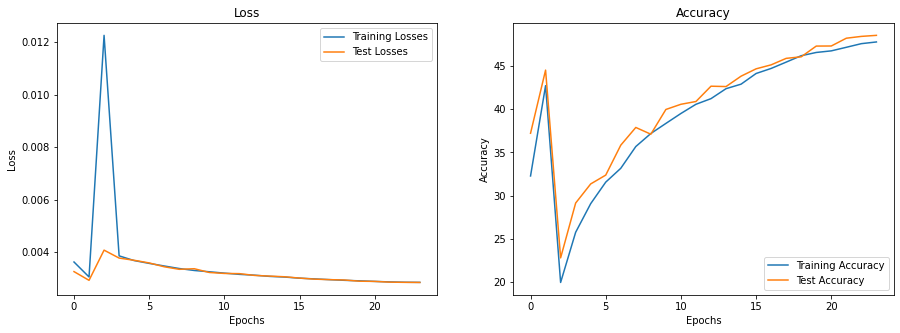

In [12]:
plot_acc_loss(train_acc,train_losses,test_acc,test_losses)

# Display wrong prediction

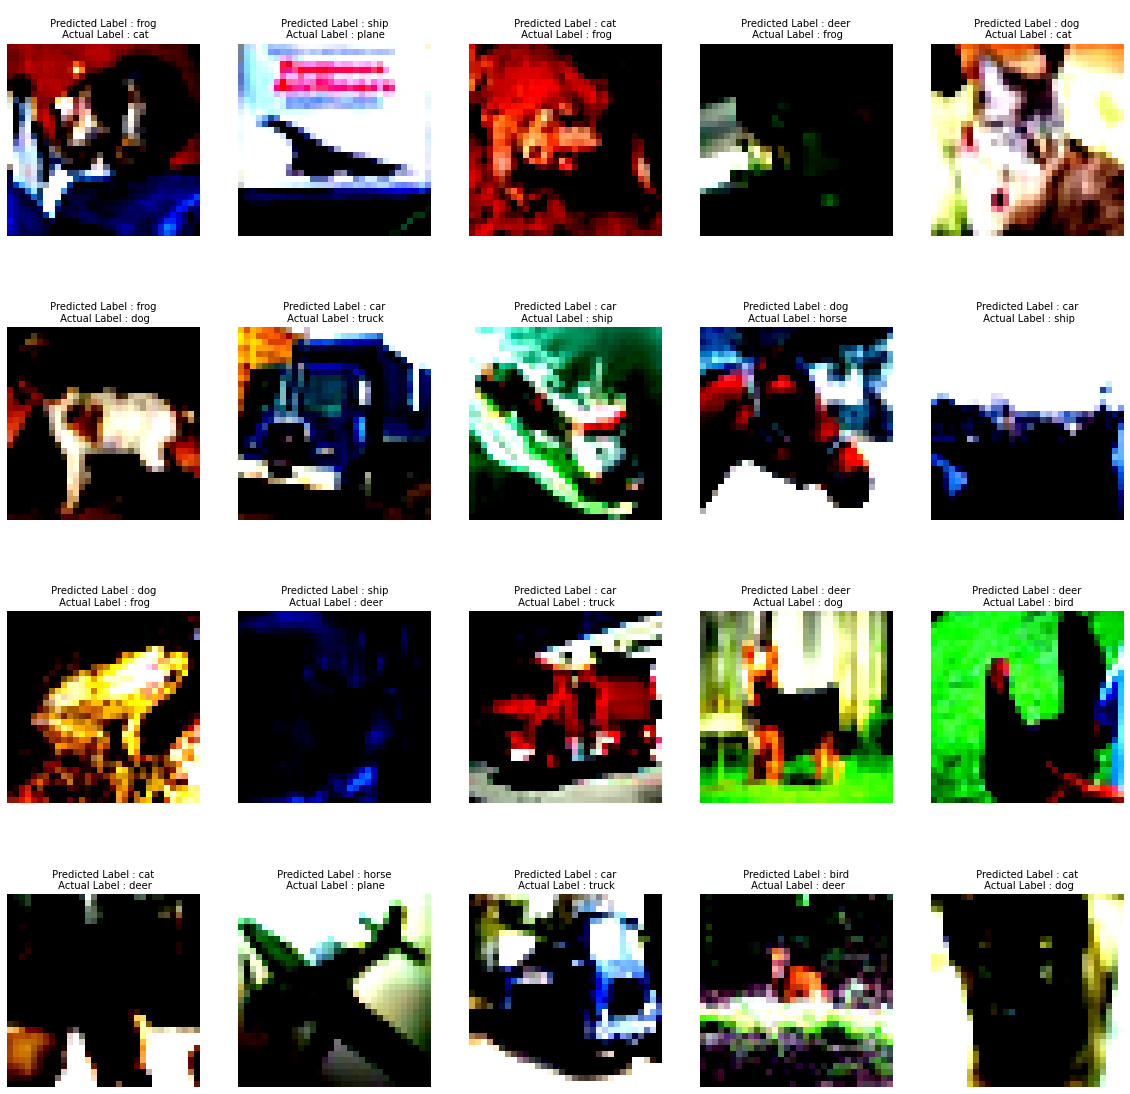

In [18]:
display_incorrect_pred(wrong_prediction_list)